In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.make_comparison_panel import make_comparison_panel

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a30cc80> (1 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.


,Score,0.95 MoE,P-Value,FDR
Gene Set,,,,
GO_14_3_3_PROTEIN_BINDING,0.523070,0.094078,0.148148,0.555556
ONGUSAHA_TP53_TARGETS,0.188894,0.466061,0.407407,0.733333
GO_NEURON_CELL_CELL_ADHESION,-0.658196,0.000663,0.074074,0.333333
GO_SH2_DOMAIN_BINDING,0.396716,0.182843,0.185185,0.555556
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,0.865167,0.000766,0.037037,0.333333
YAP signature based on mechanism,-0.865856,0.001368,0.037037,0.333333
BIOCARTA_RHO_PATHWAY,-0.373638,0.311771,0.185185,0.416667
VANTVEER_BREAST_CANCER_BRCA1_UP,-0.404066,0.432330,0.148148,0.416667
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",0.283160,0.586267,0.407407,0.916667


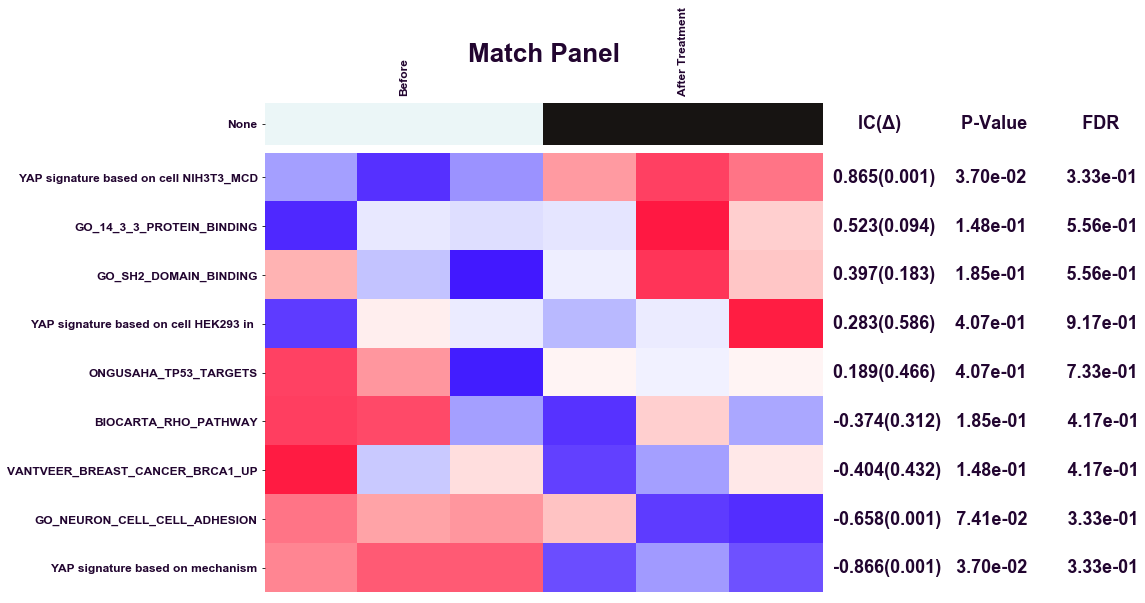

In [3]:
features = pd.read_table('gene_set_x_sample.tsv', index_col=0)

target = pd.Series((0, ) * 3 + (1, ) * 3, index=features.columns)

make_match_panel(
    target,
    features,
    target_ascending=True,
    target_int_to_str={
        0: 'Before',
        1: 'After Treatment',
    },
    target_type='binary',
    max_ytick_size=38)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a30cc80> (1 process) ...
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
Computing MoEs with 3 samplings ...
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 sa

../match/nd_array/nd_array/compute_empirical_p_value.py:13: RuntimeWarning: invalid value encountered in less_equal
  significant_random_values = random_values <= value
../match/nd_array/nd_array/compute_empirical_p_value.py:16: RuntimeWarning: invalid value encountered in greater_equal
  significant_random_values = value <= random_values


,Score,0.95 MoE,P-Value,FDR
Name,,,,
2-aminoadipate,0.360487,NaN,0.082090,0.666667
3-phosphoglycerate,0.365135,NaN,0.069652,0.643678
alpha-glycerophosphate,-0.373703,NaN,0.043532,0.555556
4-pyridoxate,0.205947,NaN,0.455224,0.828889
aconitate,0.287496,NaN,0.264925,0.943366
adenine,-0.341681,NaN,0.082090,0.656863
adipate,0.351589,NaN,0.110697,0.847619
alpha-ketoglutarate,-0.417656,NaN,0.023632,0.518519
AMP,-0.351411,NaN,0.072139,0.644444


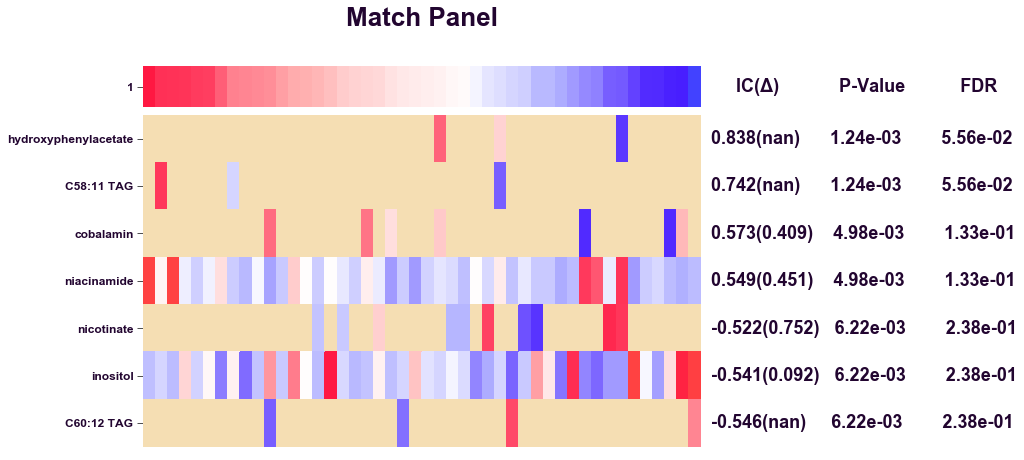

In [4]:
target = pd.read_table('target.tsv', index_col=0, header=None, squeeze=True)

features = pd.read_table('features.tsv', index_col=0)

make_match_panel(target, features, n_top_feature=3)

In [5]:
n_row = 100
n_column = 100

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a30cc80> (1 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,-0.276109,0.0713229,0.003333,0.083333
Feature 1,-0.124424,NaN,0.410000,0.928205
Feature 2,-0.091929,NaN,0.466667,0.864198
Feature 3,0.154088,NaN,0.196667,0.677778
Feature 4,-0.307770,0.0858175,0.003333,0.083333
Feature 5,0.237512,0.0595016,0.006667,0.111111
Feature 6,0.176105,0.250363,0.103333,0.516667
Feature 7,0.136566,NaN,0.260000,0.684211
Feature 8,-0.208083,0.0272064,0.073333,0.706667
Feature 9,0.212254,0.17605,0.030000,0.250000


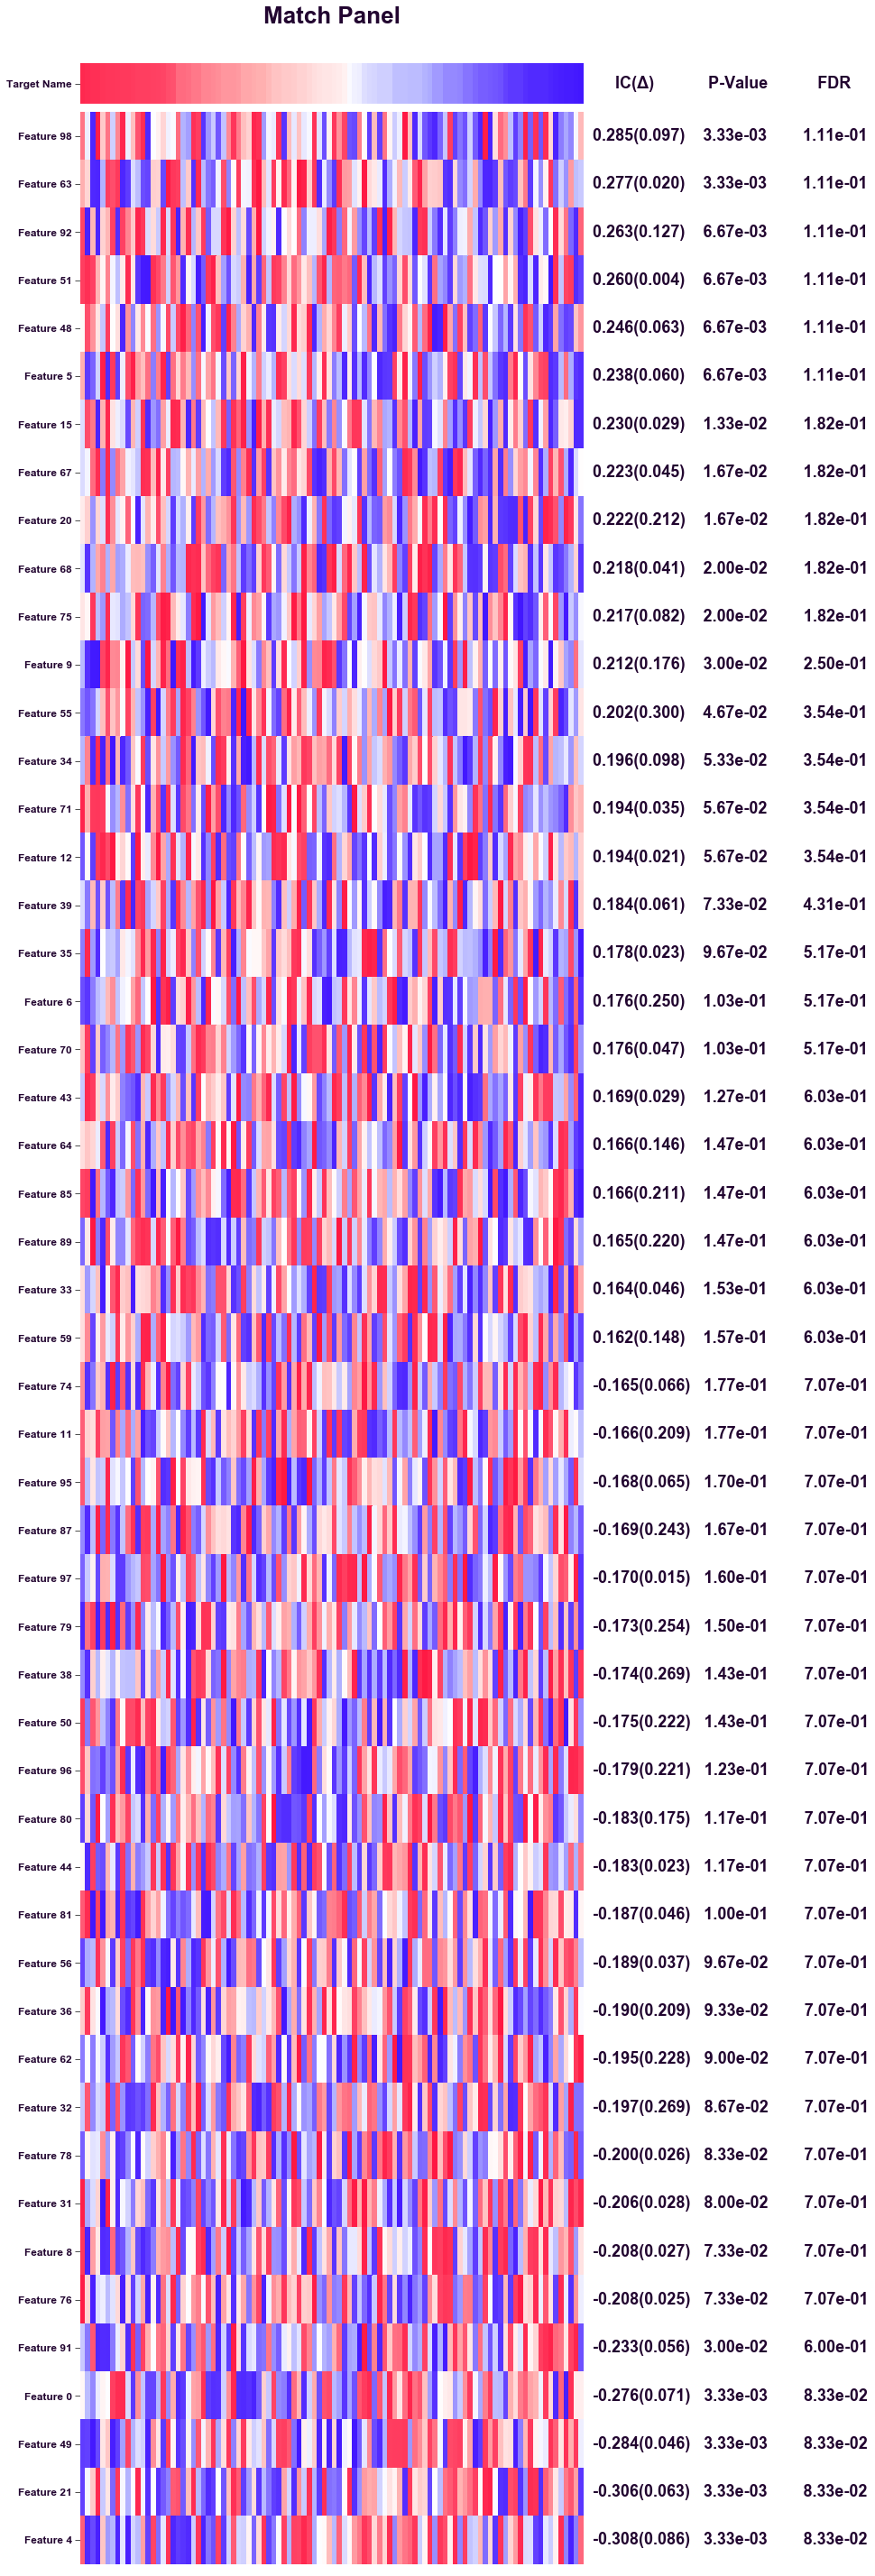

In [6]:
target = pd.Series(
    np.random.random_sample(n_column),
    name='Target Name',
    index=('Sample {}'.format(i) for i in range(n_column)))

features_continuous = pd.DataFrame(
    np.random.random_sample((
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_continuous)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a30cc80> (1 process) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead


Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,0.226425,0.24757,0.023333,0.571429
Feature 1,-0.111911,NaN,0.420000,0.898551
Feature 2,0.156478,0.0392968,0.163333,0.898551
Feature 3,0.056956,NaN,0.480000,0.898551
Feature 4,-0.121273,NaN,0.390000,0.898551
Feature 5,-0.154363,0.234178,0.220000,0.912879
Feature 6,-0.175248,0.0568834,0.133333,0.916667
Feature 7,0.158481,0.237461,0.156667,0.898551
Feature 8,-0.109936,NaN,0.430000,0.898551
Feature 9,-0.217581,0.0521255,0.056667,0.916667


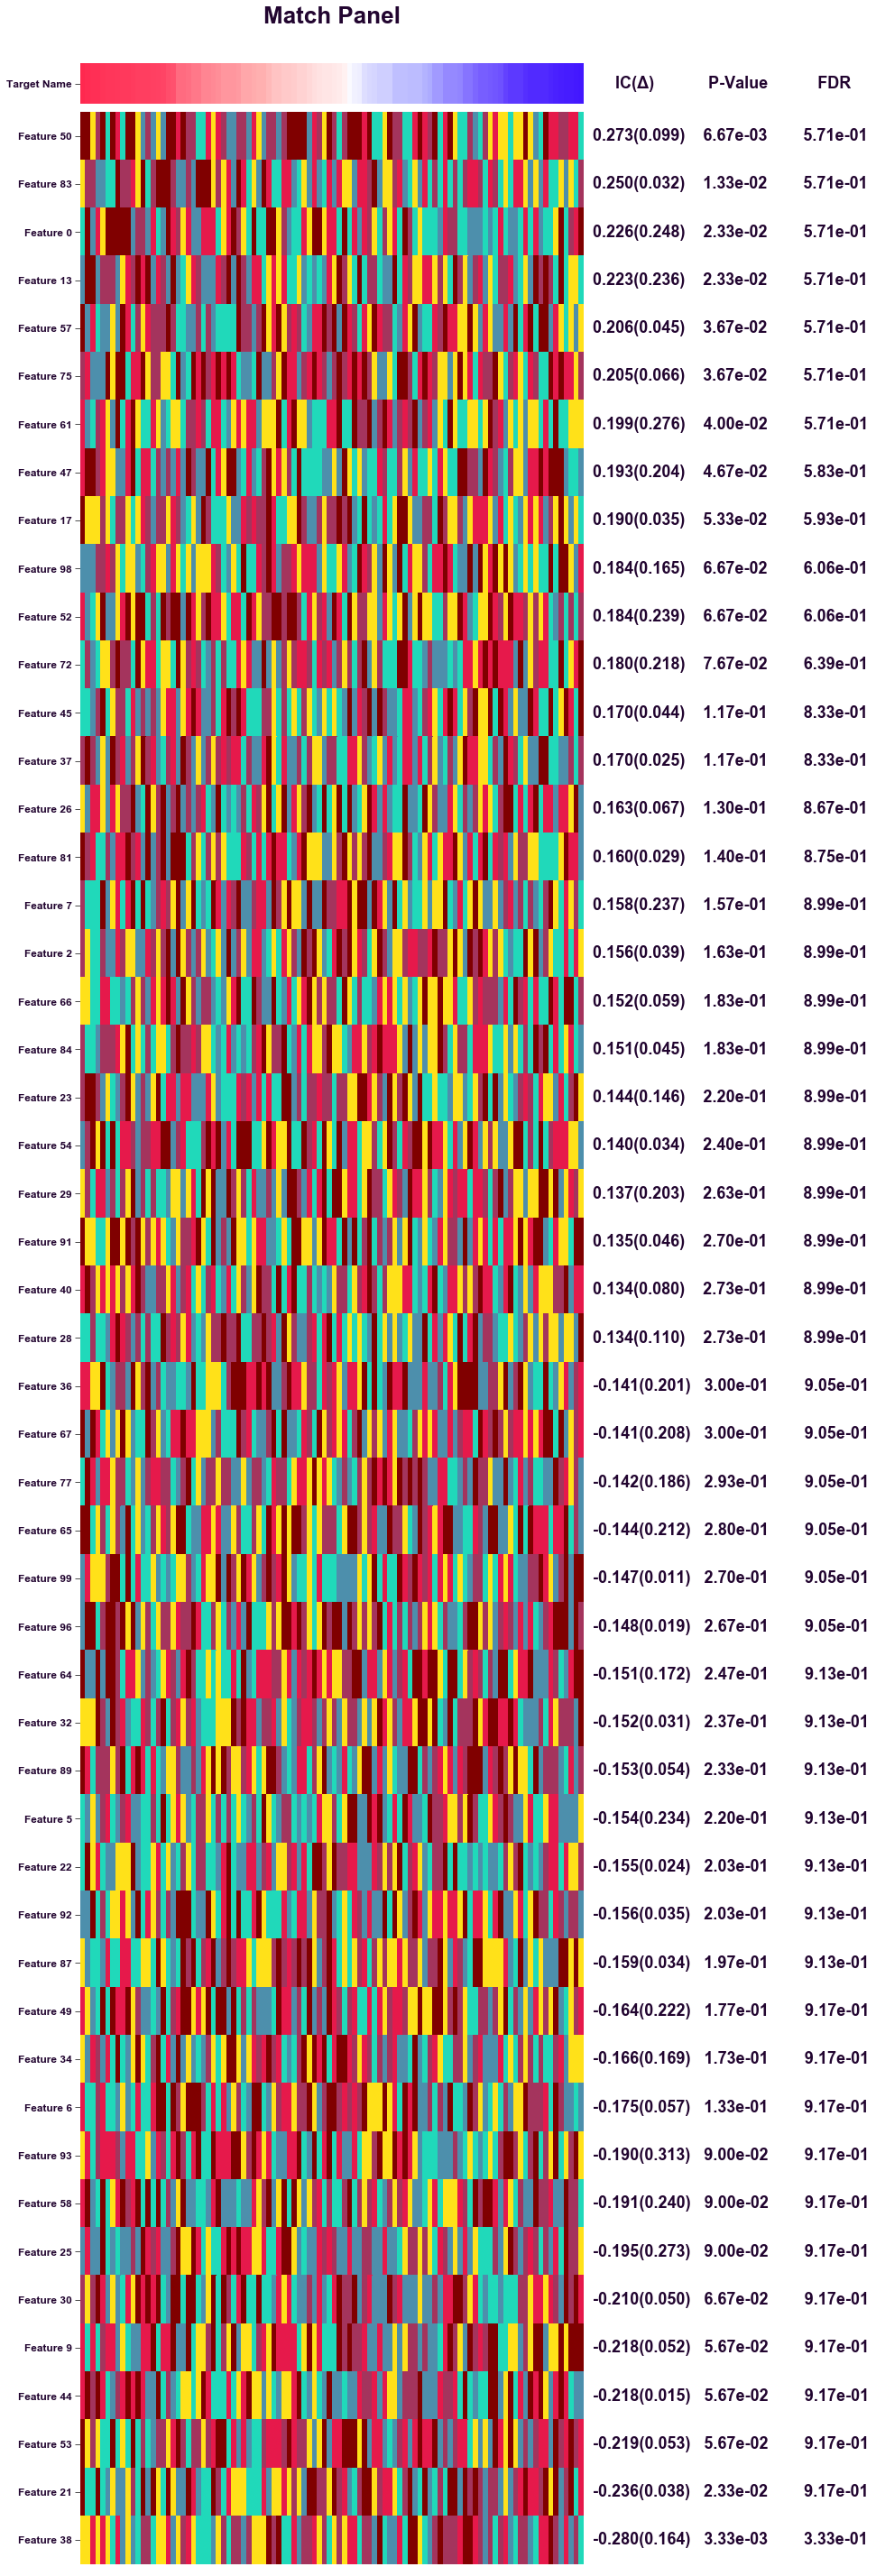

In [ ]:
features_categorical = pd.DataFrame(
    np.random.random_integers(0, 5, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_categorical, features_type='categorical')

In [ ]:
features_binary = pd.DataFrame(
    np.random.random_integers(0, 1, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_binary, features_type='binary')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a30cc80> (1 process) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


Computing MoEs with 3 samplings ...


In [ ]:
features_with_missing = features_continuous.copy()
features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n_column // 3),
    np.random.choice(features_with_missing.columns, size=n_column // 3)] = None

make_match_panel(target, features_with_missing)

In [ ]:
n = 3

multiple_features = {
    'Continuous features': {
        'df': features_continuous.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'continuous',
    },
    'Categorical features': {
        'df': features_categorical.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'categorical',
    },
    'Binary features': {
        'df': features_binary.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'binary',
    },
    'Cotinuous features (scores ascending)': {
        'df': features_continuous.iloc[:n, :-3],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous',
    },
}

In [ ]:
make_summary_match_panel(
    target, multiple_features, title='Default', plot_column_names=True)

In [ ]:
make_summary_match_panel(
    target,
    multiple_features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only Columns Shared by Target and All Features',
    plot_column_names=True)

In [ ]:
array_2d_0 = np.random.random_sample((
    n_row,
    2, ))

array_2d_1 = np.random.random_sample((
    n_row,
    8, ))

make_comparison_panel(
    array_2d_0,
    array_2d_1,
    array_2d_0_name='ND Array 0',
    array_2d_1_name='ND Array 1')